In [280]:
library('ggplot2')
library('ggpubr')
library('ggsignif')
library('MASS')
library("magrittr")
library("ggrepel")
library("EnhancedVolcano")


In [278]:
# if (!requireNamespace("BiocManager", quietly = TRUE)) 
# install.packages("BiocManager")

# BiocManager::install("EnhancedVolcano")
#devtools::install_github("kevinblighe/EnhancedVolcano")


In [296]:
fname <- "Welch_ttest/FAK_ttest_A549.csv"
outpath <- "Welch_ttest/"

data <- data.frame(readr::read_csv(fname), stringsAsFactors = F)

lst <- unique(data$Paired) %>% as.vector() 


for (i in lst){
    test1 <- data %>% filter(Paired == i)
    df <- mutate(test1, label=ifelse(test1$P.value<0.01, "pvalue<0.01", "Not Significant"))
    f <- df[with(df, order(-logp)), ]
    f1 <- f %>% filter(Statistics>0) %>% head(10)
    f2 <- f %>% filter(Statistics<0) %>% head(10)
    f3 = rbind(f1, f2)
    
    p = ggplot(df, aes(Statistics, -log10(P.value))) + 
    geom_point(aes(col=label)) + 
    scale_color_manual(values=c("black", "red")) + 
     labs(title= paste0("FAK [A549] \n \n ", i), x="Statistics", y = " -log10 [pvalue]") +
     theme(axis.text=element_text(size=12), 
        axis.title=element_text(size=14,face="bold")) +
      theme_classic(base_size = 15) +
    theme(plot.title = element_text(hjust = 0.5))
    g <- p+geom_text_repel(data= head(f3, 20), aes(label=Variables), point.padding = NA, size=2)#adding text for the top 20 genes

    ggsave(paste0("FAK_A549_", i, ".png"), g, height = 7 , width = 12, , outpath) #In case you want to easily save to disk
    
}


Parsed with column specification:
cols(
  Paired = col_character(),
  Statistics = col_double(),
  `P-value` = col_double(),
  Variables = col_character(),
  logp = col_double(),
  index = col_integer()
)



In [241]:

test1 <- data %>% filter(Paired == "DMSO, FMF-03-146-1") 

unique(test1$Paired)

[1] "DMSO, FMF-03-146-1"

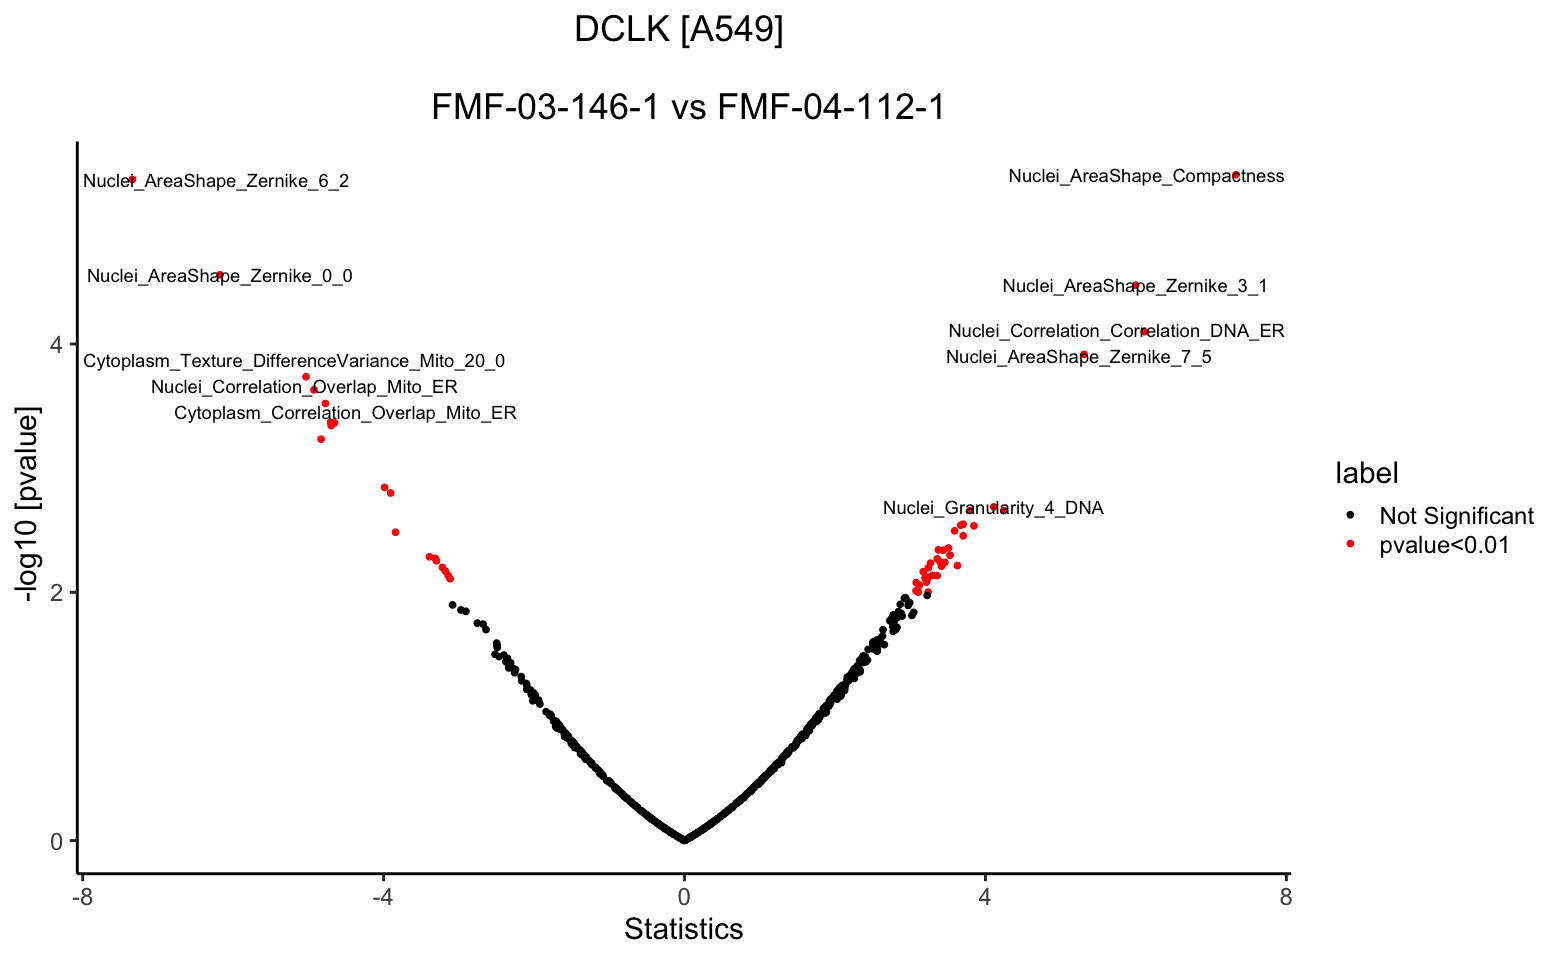

In [235]:

df <- mutate(test1, label=ifelse(test1$P.value<0.01, "pvalue<0.01", "Not Significant"))
f <- df[with(df, order(-logp)), ]
f1 <- f %>% filter(Statistics>0) %>% head(5)
f2 <- f %>% filter(Statistics<0) %>% head(5)
f3 = rbind(f1, f2)






p = ggplot(df, aes(Statistics, -log10(P.value))) + 
    geom_point(aes(col=label)) + 
    scale_color_manual(values=c("black", "red")) + 
     labs(title= "DCLK [A549] \n \n FMF-03-146-1 vs FMF-04-112-1", x="Statistics", y = " -log10 [pvalue]") +
     theme(axis.text=element_text(size=20), 
        axis.title=element_text(size=14,face="bold")) +
      theme_classic(base_size = 18) +
    theme(plot.title = element_text(hjust = 0.5))
g <- p+geom_text_repel(data= head(f3, 10), aes(label=Variables), point.padding = NA)#adding text for the top 20 genes

ggsave("welch_ttest_DCLK1_A549_FMF-03-146-1, FMF-04-112-1.png", g, height = 7 , width = 12) #In case you want to easily save to disk
g

In [121]:
library(repr)
options(repr.plot.width=13, repr.plot.height=8)



p <- ggplot(data, aes(x=index, y=logp, color=Paired)) + 
  geom_point() + 
  labs(title= "Drugs targeting DCLK [U2oS]", x="Variables ID", y = " -log10 [pvalue]") + 
  theme(axis.text=element_text(size=12),
        axis.title=element_text(size=12,face="bold"),
       strip.background=element_rect(fill="#a6bddb"),
       strip.text = element_text(size = 12)) + 
  guides(fill=guide_legend(title='Combinations')) + 
  theme(legend.title = element_text(color = "blue", size = 12),plot.title = element_text(color = "blue", size = 22, hjust=0.5),
  legend.text = element_text(color = "black", size = 14)) +
  facet_wrap(~Paired) +
  geom_hline(data=filter(data, Paired=="DMSO, FMF-03-146-1"), aes(yintercept=median(logp)), colour="red") +
  geom_hline(data=filter(data, Paired=="DMSO, FMF-04-112-1"), aes(yintercept=median(logp)), colour="green") +
  geom_hline(data=filter(data, Paired=="FMF-03-146-1, FMF-04-112-1"), aes(yintercept=median(logp)), colour="blue") 
  


# g + geom_label_repel(aes(label = Variables),
#                   box.padding   = 0.35, 
#                   point.padding = 0.5,
#                   segment.color = 'grey50') + theme_classic()
ggsave("KW_DCLK_U2oS.pdf", p, height = 7 , width = 12)